# **Machine Learning - Assignment 6**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*


---

## Introduction - Evaluation in Machine Learning

In this assignment, you will learn about common evaluation techniques in machine learning. This includes evaluating the error of the classifier, analyzing the learning curves, and performing cross-validation.

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Can explain what sources of performance variability there are in machine learning
* Knowing what a learning curve is
* Can understand the difference between train and test error
* Can explain what cross-validation is and how it is used

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

---

## 1 - Sources of Variation (**Coding**)

### **Exercise 1.1**

In this exercise we investigate the difference in behavior of the error on the training and the test set. Generate a large test set and study the variations in the classification error based on *repeatedly generated training sets*. Use one of the artificial datasets from the first week's assignment.

In [2]:
# large test set, small training set

In [3]:
### COPIED AND MODIFIED FROM ANSWER

#create a fixed test set
X_test, y_test = datasets.make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0,
                                              n_clusters_per_class=1, random_state=4)

#import linear classifier from sklearn
from sklearn.linear_model import LogisticRegression

#Create an instance of the classifier
clf = LogisticRegression()

#create a random training set multiple times modifying the random state
for i in range(10):
    X_train, y_train = datasets.make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                                                    n_clusters_per_class=1, random_state=i)

    #Train the classifier
    clf.fit(X_train, y_train)

    #Run the cell multiple times with different random states to see the difference in performance
    print(f"Accuracy on the test set when random_state = {i}: {clf.score(X_test, y_test) * 100:4.1f}%")

Accuracy on the test set when random_state = 0: 31.6%
Accuracy on the test set when random_state = 1: 51.8%
Accuracy on the test set when random_state = 2: 83.2%
Accuracy on the test set when random_state = 3: 50.8%
Accuracy on the test set when random_state = 4: 40.1%
Accuracy on the test set when random_state = 5: 46.5%
Accuracy on the test set when random_state = 6: 73.9%
Accuracy on the test set when random_state = 7: 70.1%
Accuracy on the test set when random_state = 8: 74.0%
Accuracy on the test set when random_state = 9: 49.9%


#### (a) What causes the variation in the error?

> 1. **Small Training Set Size**: Small training set leads to greater fluctuations in the sampled data and thus in the learned classifier.
>
> 2. **Random Sampling in Training Data**: The composition of the classes in each small training set varies due to randomness, causing the classifier to fit a slightly different model in each iteration, which impacts the classification error on the fixed test set.

Now do the same for different test sets:

In [4]:
### COPIED AND MODIFIED FROM ANSWER

#create a fixed training set
X_train, y_train = datasets.make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0,
                                                n_clusters_per_class=1, random_state=1)

#import linear classifier from sklearn
from sklearn.linear_model import LogisticRegression

#Create an instance of the classifier
clf = LogisticRegression()

#Train the classifier
clf.fit(X_train, y_train)

#create a large test set from the same distribution multiple times and study the difference in performance
for i in range(10):
    X_test, y_test = datasets.make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0,
                                                n_clusters_per_class=1, random_state=i)

    #Run the cell multiple times with different random states to see the difference in performance
    print(f"Accuracy on the test set when random_state = {i}: {clf.score(X_test, y_test) * 100:4.1f}%")

Accuracy on the test set when random_state = 0:  4.6%
Accuracy on the test set when random_state = 1: 88.3%
Accuracy on the test set when random_state = 2: 11.7%
Accuracy on the test set when random_state = 3: 61.1%
Accuracy on the test set when random_state = 4: 51.8%
Accuracy on the test set when random_state = 5: 48.0%
Accuracy on the test set when random_state = 6: 14.6%
Accuracy on the test set when random_state = 7: 22.7%
Accuracy on the test set when random_state = 8: 79.7%
Accuracy on the test set when random_state = 9: 43.3%


#### (b) Again explain what causes the variance observed in the results.

> 1. **Random Sampling in Test Data**: Although each test set is relatively large, the exact composition of samples varies. The distribution of class samples leads to small variations in the calculated error rate.
>
> 2. **Fixed Classifier, Variable Testing Conditions**: Since the classifier is fixed, the observed error rate changes solely based on the composition of each new test set. Larger test sets would reduce this variation, but some level of variation remains as each test set captures slightly different aspects of the population.

---

## 2 - Learning Curves (**Coding**)

### **Exercise 2.1**

Using prtools lib, generate Highleyman classes (gendath) with a 1000 samples per class. Enlarge the feature dimensionality of this set by adding 60 dimensions of class independent randomness, i.e., plain noise. After that, use the function pr.cleval to generate learning curves for nmc, ldc, and qdc using 64, 128, 256, and 512 objects in the training set (make sure that you repeat often enough. . . ). Note that cleval automatically plots the learning curves.

In [5]:
# !git clone https://github.com/DMJTax/prtools.git
# !pip install -e prtools
!pip install git+https://github.com/DMJTax/prtools.git
import prtools as pr

  Cloning https://github.com/DMJTax/prtools.git to /tmp/pip-req-build-tb86irii
  Running command git clone --filter=blob:none --quiet https://github.com/DMJTax/prtools.git /tmp/pip-req-build-tb86irii
  Resolved https://github.com/DMJTax/prtools.git to commit 38dee74c266c54a1c75318390edc21a87668264f
  Preparing metadata (setup.py) ... done


In [6]:
help(pr.cleval)

Help on function cleval in module prtools.prtools:

cleval(a, u, trainsize=[2, 3, 5, 10, 20, 30], nrreps=3, testfunc=<function testc at 0x795d04236710>)
    Learning curve
    
           E = cleval(A,U,TRAINSIZE,NRREPS)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A for varying training set sizes. Default is
    trainsize=[2,3,5,10,20,30].
    To get reliable estimates, the train-test split is repeated NRREPS=3
    times.
    
    Example:
    a = gendatb([100,100])
    u = nmc()
    e = cleval(a,u,nrreps=10)



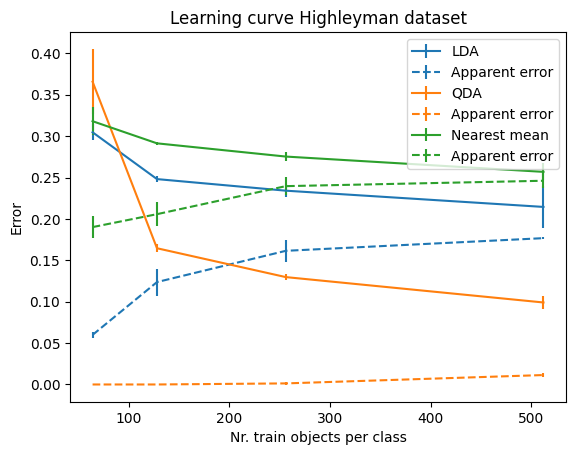

In [7]:
# pr.cleval: classifier evaluation (learning curve)

## COPIED FROM ANSWER
#for this specific exercise, we need to use prtools as it gives
#us the possibility to generate a this specific kind of data

#generate a hyghleyman dataset with a 1000 samples per class
a = pr.gendath([1000,1000])  # Highleyman dataset 2000 by 2 prdataset with 2 classes: [1000 1000]

#add some noise to the dataset
noise = np.random.randn(2000, 60)

## FIXED: Bug in the given answer!!!!!!
## return: Error structure containing training and test errors
a = a.concatenate(noise, axis=1)


#use cleval to evaluate the performance of a classifier
trainsize = (64, 128, 256, 512)
e = pr.cleval(a, pr.ldc(), trainsize=trainsize)
f = pr.cleval(a, pr.qdc(), trainsize=trainsize)
g = pr.cleval(a, pr.nmc(), trainsize=trainsize)

#### (a) Can you explain the overall behavior of these curves?

> Test curves go down, training curves (apparent errors) go up. Both curves should converge in the end. Where the curves converge depend a bit on what classifier you use. More flexible classifiers get a lower asymptotic error.

#### (b) Explain why the curves intersect. Which classifier performs best?

> Simpler classifiers work generally better when sample sizes are small. More complex classifiers work better when sample sizes are large.
>
> ***None of the classifiers is best.***

#### (c) What do you expect the limiting behavior of learning curves is? That is, if we were able to train on more and more data?

> Training and test error converge to same value, QDC < LDC < NMC.

---

## 3 - Cross-Validation (**Coding**)

### **Exercise 3.1**

Generate a small data set, say, with 10 objects per class.

In [8]:
# COPIED FROM ANSWER

from sklearn.datasets import make_classification

#generate a small dataset with 10 objects per class, 3 classes

X, y = make_classification(n_samples=60, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=27)

#### (a) Using n-fold cross-validation, make plots for the error rates for kNN and 1NN over different values of n. Also calculate the standard deviation of the error estimate, e.g., by performing the cross-validation 10 times

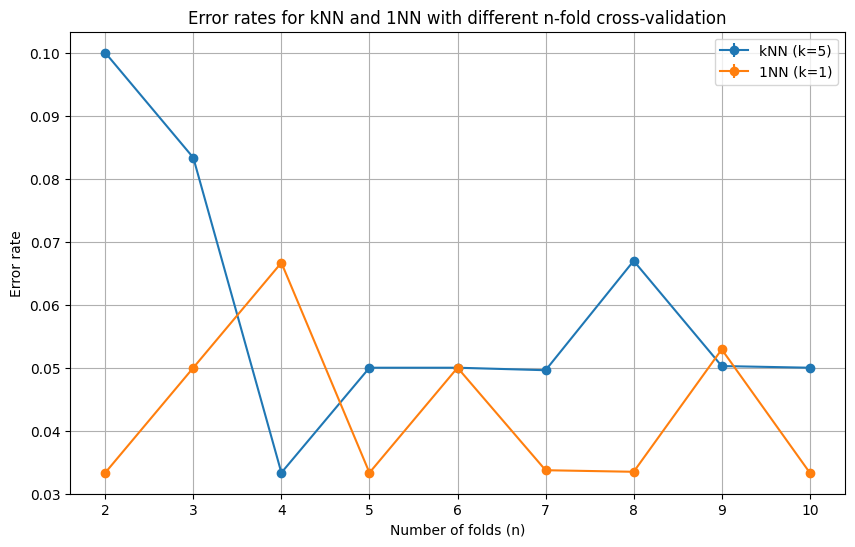

In [9]:
# COPIED FROM ANSWER

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Define the range of n for n-fold cross-validation
n_splits_range = range(2, 11)

# Initialize lists to store mean error rates and standard deviations
error_rates_knn = []
error_std_knn = []
error_rates_1nn = []
error_std_1nn = []

# Perform cross-validation and collect error rates for kNN (e.g. k = 5) and 1NN
for n_splits in n_splits_range:
    knn_errors = []
    knn_1_errors = []
    ## StratifiedKFold: ensure that each fold has the same proportion of each class label as the original dataset
    ## maintain class distribution consistency across training and validation sets
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for _ in range(10):  # Repeat the cross-validation process 10 times
        knn = KNeighborsClassifier(n_neighbors=5)
        knn_1 = KNeighborsClassifier(n_neighbors=1)

        knn_scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
        knn_1_scores = cross_val_score(knn_1, X, y, cv=skf, scoring='accuracy')

        knn_errors.append(1 - np.mean(knn_scores))
        knn_1_errors.append(1 - np.mean(knn_1_scores))

    error_rates_knn.append(np.mean(knn_errors))
    error_std_knn.append(np.std(knn_errors))
    error_rates_1nn.append(np.mean(knn_1_errors))
    error_std_1nn.append(np.std(knn_1_errors))

# Plotting the error rates with standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(n_splits_range, error_rates_knn, yerr=error_std_knn, label='kNN (k=5)', fmt='-o')
plt.errorbar(n_splits_range, error_rates_1nn, yerr=error_std_1nn, label='1NN (k=1)', fmt='-o')
plt.xlabel('Number of folds (n)')
plt.ylabel('Error rate')
plt.title('Error rates for kNN and 1NN with different n-fold cross-validation')
plt.legend()
plt.grid(True)
plt.show()

#### (b) What do you notice about the estimated error rates? What is the general trend (maybe you should redo the data generation and the cross-validation a couple of times).

> Typically you get a less biased estimate of the error when you increase n, but the variance typically increases a bit with larger n.
>
Illustrations by ChatGPT:
>
> **Cross-validation Bias**: Increasing n (thus, reducing the size of each test fold) generally leads to a lower bias in cross-validation. <u>With more folds, more data is available for training in each fold</u>, making each model trained closer to one trained on the entire dataset. This reduces the estimation bias of the model's true generalization error.
>
> **Cross-validation Variance**: Increasing n typically raises the variance of cross-validation estimates because each test fold is smaller. <u>Smaller test sets make each fold's evaluation more sensitive to the specific data points within it, so the model's performance might vary more across different folds.</u>

Conclusion: $n\uparrow$ $\Rightarrow$ $bias \downarrow, variance \uparrow$

#### (c) What happens to the variance of the estimates for varying n? Again, we are interested in the general trend.

> See above

#### (d) How would the observations change if one would repeat the experiments with much larger dataset? Would they change?

> For a larger dataset, the bias and the variance are both a bit smaller.